In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercices sur la corrélation

A) Corréler les signaux suivants :

        S1=[1,0,0,-2,0,0,1]
        S2=[-1,0,0,2,0,0,-1]

B) Corrélez le signal S1 ci-dessus avec le signal suivant :

        CR=[0,0,0,1,0,0,0]

C) Générez un signal $S_a= (rand()-0.5) + \frac{1}{10}sin(2\pi f_0 t)$. Générez un signal de 1000 point, et sélectionnez f0 pour avoir 20 périodes environ.

- Corrélez ce signal avec lui-même
- Corrélez ce signal avec $sin(2\pi f_0 t)$
- Observez les résultats. Quel avantage aurait la corrélation dans ce cas.
- Calculez une convolution de $S_a$ avec lui-même. Commentez le résultat.

## Solutions

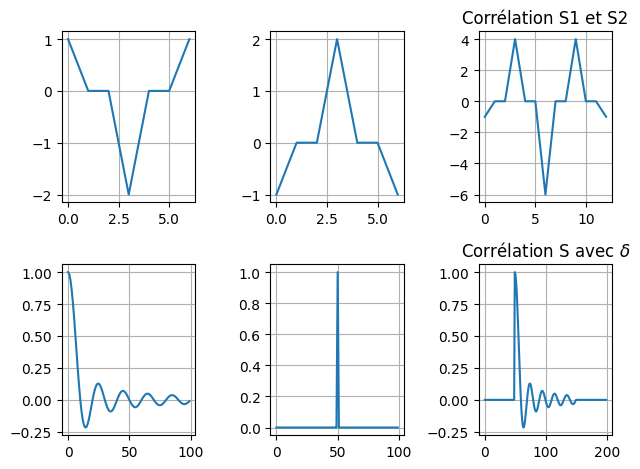

In [2]:
# Solutions A) et B)
S11=np.array([1,0,0,-2,0,0,1])
S12=np.array([-1,0,0,2,0,0,-1])
C1=np.correlate(S11,S12,'full')

N=100
S21=np.sinc(10*np.arange(N)/N)
S22=np.zeros(N);S22[N//2]=1
C2=np.correlate(S21,S22,'full')

plt.rcParams['axes.grid'] = True
fig, ax=plt.subplots(2,3)
ax[0,0].plot(S11);ax[0,1].plot(S12);ax[0,2].plot(C1)
ax[0,2].set_title("Corrélation S1 et S2")
ax[1,0].plot(S21);ax[1,1].plot(S22);ax[1,2].plot(C2)
ax[1,2].set_title("Corrélation S avec $\delta$")
plt.tight_layout()

Text(0.5, 1.0, 'Signal composé et sa composante sinusoïdale')

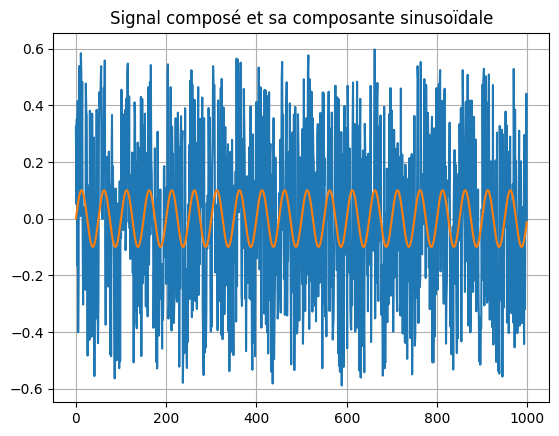

In [29]:
#C)
N=1000
f0=20
t=np.arange(N)
Si=np.sin(2*np.pi*f0*t/N)*0.1
Sa= (np.random.random(N)-0.5)+Si

plt.plot(Sa)
plt.plot(Si)
plt.title("Signal composé et sa composante sinusoïdale")

Text(0.5, 1.0, 'Autocorrélation du signal composé')

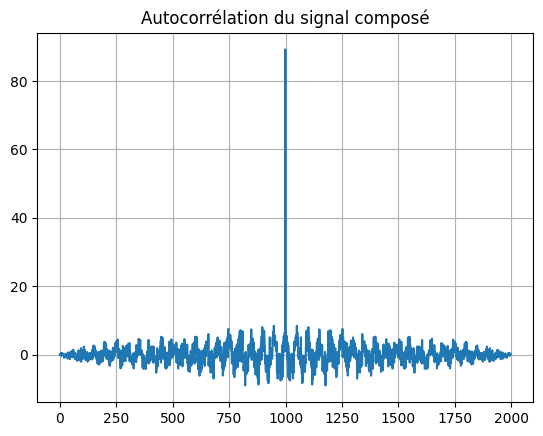

In [30]:
Cauto=np.correlate(Sa,Sa,'full')
plt.plot(Cauto)
plt.title("Autocorrélation du signal composé")

Text(0.5, 1.0, 'Corrélation du signal composé avec la sinusoïde')

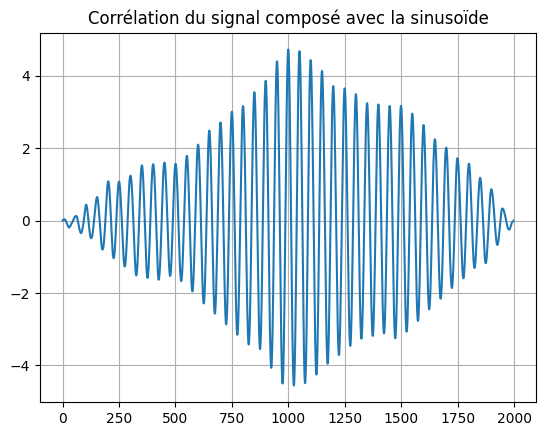

In [32]:
Cor=np.correlate(Si,Sa,'full')
plt.plot(Cor)
plt.title("Corrélation du signal composé avec la sinusoïde")

L'auto-corrélation montre la présence de la sinusoïde. Le point en 0 est dominant. La corrélation avec le sinus montre la présence de cette composante en rejetant le bruit.

Text(0.5, 1.0, 'Convolution du signal composé')

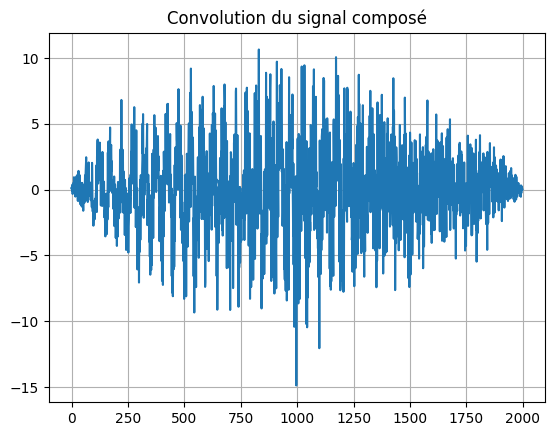

In [33]:
Cconv=np.convolve(Sa,Sa)
plt.plot(Cconv)
plt.title("Convolution du signal composé")

On observe que la convolution met en évidence la sinusoïde sans la forte corrélation en 0.

Text(0.5, 1.0, 'Convolution du signal composé avec la sinusoïde')

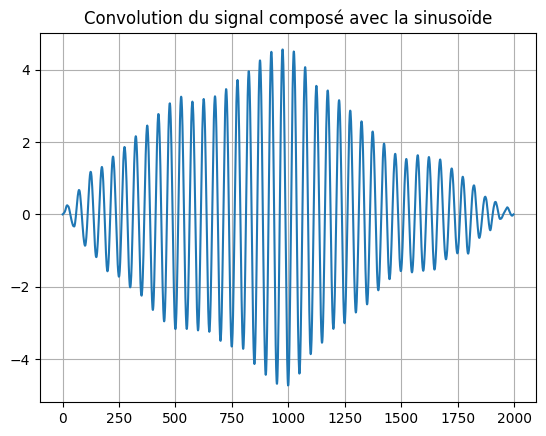

In [34]:
Cconv=np.convolve(Sa,Si)
plt.plot(Cconv)
plt.title("Convolution du signal composé avec la sinusoïde")